# Project ML version 2 


In [90]:
import pandas as pd
appointment=pd.read_csv("KaggleV2-May-2016.csv")

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [93]:
appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [94]:
appointment.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

## Descriptive stats 

- do the plots with show and no show depending on several parameter, maybe look at the correlations...
- say from where the data comes from and so on 

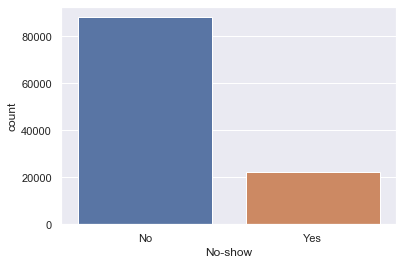

In [95]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="No-show", data=appointment)

In [176]:
appointment['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

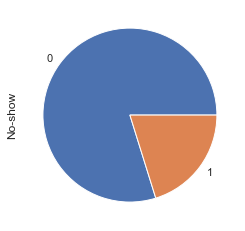

In [175]:
import matplotlib as plt
appointment['No-show'].value_counts().plot(kind='pie')

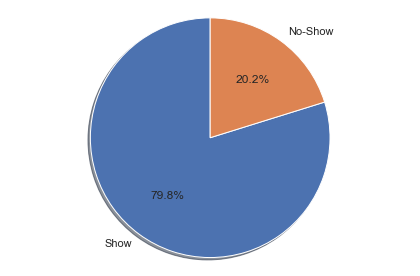

In [178]:
import matplotlib.pyplot as plt


labels = ['Show', 'No-Show']
sizes = [88208/(88208+22319), 22319/(88208+22319)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

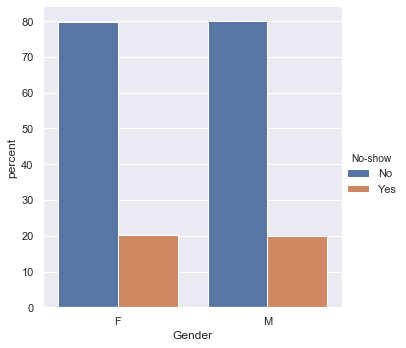

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)



y,x = 'No-show', 'Gender'

(appointment
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


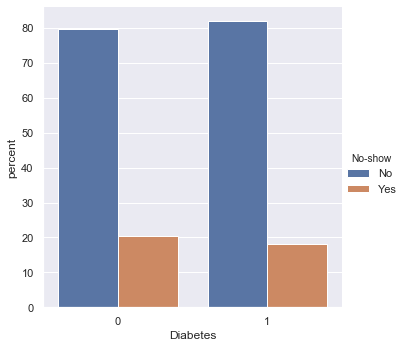

In [98]:
y,x = 'No-show', 'Diabetes'

(appointment
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

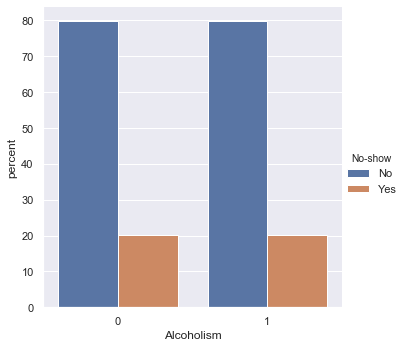

In [99]:
y,x = 'No-show', 'Alcoholism'

(appointment
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

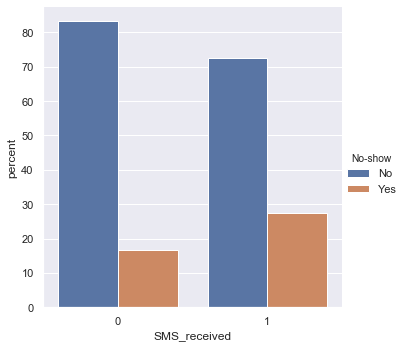

In [100]:

y,x = 'No-show', 'SMS_received'

(appointment
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

### Changement of the Neighbourhood category

In [101]:
appointment.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [102]:
appointment.loc[appointment['Neighbourhood'].isin((appointment['Neighbourhood'].value_counts()[appointment['Neighbourhood'].value_counts() < 3000]).index), 'Neighbourhood']= 'other'

In [103]:
appointment.Neighbourhood.value_counts()

other              75586
JARDIM CAMBURI      7717
MARIA ORTIZ         5805
RESISTÊNCIA         4431
JARDIM DA PENHA     3877
ITARARÉ             3514
CENTRO              3334
TABUAZEIRO          3132
SANTA MARTHA        3131
Name: Neighbourhood, dtype: int64

### gestion of dates and types in general 

In [104]:
import numpy as np 


appointment.AppointmentDay = appointment.AppointmentDay.apply(np.datetime64)
appointment.ScheduledDay = appointment.ScheduledDay.apply(np.datetime64)
#appointment.AwaitingTime = appointment.AwaitingTime.apply(abs)

In [105]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,other,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,other,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,other,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,other,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,other,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,other,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,other,0,0,0,0,0,0,No


In [106]:
appointment['Gender'] = appointment['Gender'].astype('object')
appointment['Neighbourhood'] = appointment['Neighbourhood'].astype('object')

appointment['No-show'] = appointment['No-show'].map({'Yes': '1', 'No': '0'})
#appointment['No-show'] = appointment['No-show'].astype('bool')


#appointment['Scholarship'] = appointment['Scholarship'].astype('bool')


#appointment['Hipertension'] = appointment['Hipertension'].astype('bool')


#appointment['Diabetes'] = appointment['Diabetes'].astype('bool')


#appointment['Alcoholism'] = appointment['Alcoholism'].astype('bool')


#appointment['Alcoholism'] = appointment['Alcoholism'].astype('bool')


#appointment['Handcap'] = appointment['Handcap'].astype('bool')


#appointment['SMS_received'] = appointment['SMS_received'].astype('bool')

appointment['AppointmentID'] = appointment['AppointmentID'].astype('object')

In [107]:
appointment.dtypes

PatientId                float64
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [108]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,other,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,other,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,other,0,1,0,0,0,0,0
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,other,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,other,0,0,0,0,0,0,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,other,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,other,0,0,0,0,0,0,0


## Feature engineering 

#### we will now modify our variables to have the final dataset

- creation of one variable representing the difference between schedule and appointement day,
- patient id and Appointment id to drop or to convert into float/int 
- scheduleDay changed into several variables
    - year if there is several
    - month -> one hot encoded ? 
    - day 
    - maybe actually day of the week would make more sens -> one-hot encoded ? 
    - hour 

- Appointment day, 
    - year 
    - month -> one-hot encoded 
    - day of the week -> one hot encoded 
- Neighboorhood: one hot encoded and maybe drop some columns... 
- one hot encoding for Gender


creation of a variable for the difference between the scheduleDay and the Appointement day

In [109]:
appointment['differenceDay']=appointment['AppointmentDay']-appointment['ScheduledDay']
# put in hours differences
appointment['differenceDay'] = appointment['differenceDay'].apply(lambda x: x.total_seconds()/3600)
# abs value  
appointment['differenceDay']=abs(appointment['differenceDay'])

In [110]:
# abs value  
appointment['differenceDay']=abs(appointment['differenceDay'])

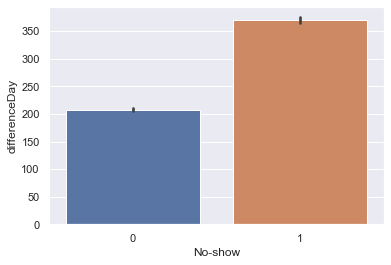

In [111]:
ax = sns.barplot(x="No-show",y='differenceDay', data=appointment)

- patient id and Appointment id to drop or to convert into float/int, might add some predictive power 

In [112]:
appointment['PatientId'] = appointment['PatientId'].astype('float')
appointment['AppointmentID'] = appointment['AppointmentID'].astype('float')

# - scheduleDay changed into several variables
    - year if there is several
    - month -> one hot encoded ? 
    - day 
    - maybe actually day of the week would make more sens -> one-hot encoded ? 
    - hour 



In [113]:
appointment['ScheduledDay'][1].year

2016

In [114]:
import datetime
appointment['ScheduledDay'] = pd.to_datetime(appointment['ScheduledDay'])


appointment['Year_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).year
appointment['Month_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).month
appointment['Day_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).day
appointment['Hour'] = pd.DatetimeIndex(appointment['ScheduledDay']).hour
appointment['DOW_S']=pd.DatetimeIndex(appointment['ScheduledDay']).dayofweek
appointment['DOW_S'] = appointment['DOW_S'].astype('category')
#appointment['DOW_S'].value_counts()

In [115]:
### To be done change the var down_S into 0-> Monday, 1= Tuesday etc  etc ... 

In [116]:
#appointment['DOW_S'] = appointment['DOW_S'].astype('category')
appointment['DOW_S'][1:10]


1    4
2    4
3    4
4    4
5    2
6    2
7    2
8    4
9    2
Name: DOW_S, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

### Appointment day

In [117]:
appointment['Year_A'] = pd.DatetimeIndex(appointment['AppointmentDay']).year
appointment['Month_A'] = pd.DatetimeIndex(appointment['AppointmentDay']).month
appointment['Day_A'] = pd.DatetimeIndex(appointment['AppointmentDay']).day
appointment['DOW_A']=pd.DatetimeIndex(appointment['AppointmentDay']).dayofweek
appointment['DOW_A'] = appointment['DOW_A'].astype('category')

In [118]:
## remove the variable dates

appointment=appointment.drop(columns=['ScheduledDay', 'AppointmentDay'])

## One hot encoding 


In [119]:
appointment.dtypes

PatientId         float64
AppointmentID     float64
Gender             object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
differenceDay     float64
Year_S              int64
Month_S             int64
Day_S               int64
Hour                int64
DOW_S            category
Year_A              int64
Month_A             int64
Day_A               int64
DOW_A            category
dtype: object

In [120]:
appointment['Gender'] = appointment['Gender'].astype('object')
appointment['Neighbourhood'] = appointment['Neighbourhood'].astype('object')
appointment['DOW_S'] = appointment['DOW_S'].astype('object')
appointment['DOW_A'] = appointment['DOW_A'].astype('object')
appointment.dtypes

PatientId        float64
AppointmentID    float64
Gender            object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
differenceDay    float64
Year_S             int64
Month_S            int64
Day_S              int64
Hour               int64
DOW_S             object
Year_A             int64
Month_A            int64
Day_A              int64
DOW_A             object
dtype: object

In [121]:
appointment_hot=appointment

from sklearn.preprocessing import LabelEncoder
# create instance from LabelEncoder
class_label = LabelEncoder()

appointment_hot["Gender"] = class_label.fit_transform(appointment_hot["Gender"].values)
appointment_hot["DOW_S"] = class_label.fit_transform(appointment_hot["DOW_S"].values)
appointment_hot.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,differenceDay,Year_S,Month_S,Day_S,Hour,DOW_S,Year_A,Month_A,Day_A,DOW_A
0,2.987250e+13,5642903.0,0,62,JARDIM DA PENHA,0,1,0,0,0,...,18.635556,2016,4,29,18,4,2016,4,29,4
1,5.589978e+14,5642503.0,1,56,JARDIM DA PENHA,0,0,0,0,0,...,16.140833,2016,4,29,16,4,2016,4,29,4
2,4.262962e+12,5642549.0,0,62,other,0,0,0,0,0,...,16.317778,2016,4,29,16,4,2016,4,29,4
3,8.679512e+11,5642828.0,0,8,other,0,0,0,0,0,...,17.491944,2016,4,29,17,4,2016,4,29,4
4,8.841186e+12,5642494.0,0,56,JARDIM DA PENHA,0,1,1,0,0,...,16.123056,2016,4,29,16,4,2016,4,29,4


In [122]:
b=['Gender','Neighbourhood','DOW_S','DOW_A']
for col in b:
    appointment_hot = pd.get_dummies(appointment_hot, columns=[col])
appointment_hot.head(6)  

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,DOW_S_2,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5
0,2.987250e+13,5642903.0,62,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,5.589978e+14,5642503.0,56,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.262962e+12,5642549.0,62,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,8.679512e+11,5642828.0,8,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,8.841186e+12,5642494.0,56,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,9.598513e+13,5626772.0,76,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [123]:
appointment_hot.dtypes

PatientId                        float64
AppointmentID                    float64
Age                                int64
Scholarship                        int64
Hipertension                       int64
Diabetes                           int64
Alcoholism                         int64
Handcap                            int64
SMS_received                       int64
No-show                           object
differenceDay                    float64
Year_S                             int64
Month_S                            int64
Day_S                              int64
Hour                               int64
Year_A                             int64
Month_A                            int64
Day_A                              int64
Gender_0                           uint8
Gender_1                           uint8
Neighbourhood_CENTRO               uint8
Neighbourhood_ITARARÉ              uint8
Neighbourhood_JARDIM CAMBURI       uint8
Neighbourhood_JARDIM DA PENHA      uint8
Neighbourhood_MA

In [124]:
appointment_hot.head(10)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,...,DOW_S_2,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5
0,2.987250e+13,5642903.0,62,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,5.589978e+14,5642503.0,56,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.262962e+12,5642549.0,62,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,8.679512e+11,5642828.0,8,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,8.841186e+12,5642494.0,56,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,9.598513e+13,5626772.0,76,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,7.336882e+14,5630279.0,23,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
7,3.449833e+12,5630575.0,39,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
8,5.639473e+13,5638447.0,21,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,7.812456e+13,5629123.0,19,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### split into train and test 

In [125]:
X1=appointment_hot.loc[:, appointment_hot.columns != 'No-show']
y=appointment_hot['No-show']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
X1, y, test_size=0.2, random_state=11)

In [126]:
X1.dtypes

PatientId                        float64
AppointmentID                    float64
Age                                int64
Scholarship                        int64
Hipertension                       int64
Diabetes                           int64
Alcoholism                         int64
Handcap                            int64
SMS_received                       int64
differenceDay                    float64
Year_S                             int64
Month_S                            int64
Day_S                              int64
Hour                               int64
Year_A                             int64
Month_A                            int64
Day_A                              int64
Gender_0                           uint8
Gender_1                           uint8
Neighbourhood_CENTRO               uint8
Neighbourhood_ITARARÉ              uint8
Neighbourhood_JARDIM CAMBURI       uint8
Neighbourhood_JARDIM DA PENHA      uint8
Neighbourhood_MARIA ORTIZ          uint8
Neighbourhood_RE

In [127]:
X_train.dtypes

PatientId                        float64
AppointmentID                    float64
Age                                int64
Scholarship                        int64
Hipertension                       int64
Diabetes                           int64
Alcoholism                         int64
Handcap                            int64
SMS_received                       int64
differenceDay                    float64
Year_S                             int64
Month_S                            int64
Day_S                              int64
Hour                               int64
Year_A                             int64
Month_A                            int64
Day_A                              int64
Gender_0                           uint8
Gender_1                           uint8
Neighbourhood_CENTRO               uint8
Neighbourhood_ITARARÉ              uint8
Neighbourhood_JARDIM CAMBURI       uint8
Neighbourhood_JARDIM DA PENHA      uint8
Neighbourhood_MARIA ORTIZ          uint8
Neighbourhood_RE

### Creation of a balance Xtrain, Y train from bootsraping for prediction 


In [128]:
X2= X_train.copy(deep=True)
X2["No-show"]=y_train.copy(deep=True)

In [129]:
X2.head()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,...,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5,No-show
65804,4.684362e+14,5667828.0,1,0,0,0,0,0,0,8.165000,...,0,1,0,0,0,0,0,1,0,0
38855,7.222263e+11,5543382.0,49,0,0,0,1,0,1,685.914167,...,0,0,0,0,0,1,0,0,0,0
8434,2.688613e+13,5738866.0,63,0,0,0,1,0,0,11.800833,...,0,0,0,0,0,1,0,0,0,0
8837,8.121397e+13,5723661.0,48,0,0,0,0,0,0,8.482500,...,0,1,0,0,0,0,0,1,0,0
60571,2.224798e+12,5617054.0,45,0,1,0,0,0,1,368.680556,...,0,0,0,0,0,1,0,0,0,0


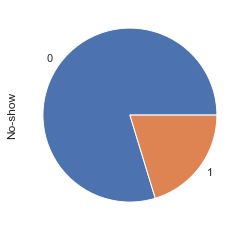

In [130]:
import matplotlib as plt
X2['No-show'].value_counts().plot(kind='pie')


In [131]:
# Class count
X2['No-show'].value_counts()

0    70480
1    17941
Name: No-show, dtype: int64

 We would like to do a balanced data of 30 000 of each class using bootstrap 

In [132]:

# Divide by class
X2_0 = X2[X2['No-show'] == '0']
X2_1 = X2[X2['No-show'] == '1']


In [133]:
# Bootstrap
N=30000
X2_0_boot = X2_0.sample(n=N, replace=True)
X2_1_boot = X2_1.sample(n=N, replace=True)
X2_boot = pd.concat([X2_0_boot, X2_1_boot], axis=0)

In [134]:
X2_boot['No-show'].value_counts()

1    30000
0    30000
Name: No-show, dtype: int64

In [135]:
X2_boot.head(5)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,...,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5,No-show
105768,6.967498e+10,5659028.0,4,0,0,0,0,0,1,803.018056,...,0,0,0,0,1,0,0,0,0,0
3649,8.343894e+11,5533039.0,19,0,0,0,0,0,1,802.777500,...,1,0,0,0,0,1,0,0,0,0
67475,3.627767e+13,5426777.0,21,0,0,0,0,0,0,1690.834722,...,1,0,0,0,0,0,0,1,0,0
12595,6.481714e+14,5741831.0,3,0,0,0,0,0,0,7.478611,...,0,0,0,1,0,0,0,0,0,0
37409,1.799662e+13,5637864.0,9,0,0,0,0,0,1,160.542222,...,0,1,0,0,0,0,0,1,0,0


In [136]:
# we just gonna change the order maybe do some one hot enco, also need the descriptive stats 
from sklearn.utils import shuffle
X2_boot = shuffle(X2_boot)
X2_boot.head(5)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,...,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5,No-show
56108,7.177345e+14,5668289.0,9,0,0,0,0,0,0,63.189167,...,0,1,0,1,0,0,0,0,0,1
38009,3.679249e+14,5573206.0,29,0,0,0,0,0,1,683.862500,...,0,0,0,0,0,1,0,0,0,1
57270,9.488281e+12,5679475.0,18,0,0,0,0,0,0,14.012222,...,0,0,0,0,0,1,0,0,0,1
30901,1.938522e+12,5690528.0,28,0,0,0,0,0,1,445.816944,...,1,0,0,0,1,0,0,0,0,0
24007,2.994883e+11,5545086.0,21,1,0,0,0,0,1,826.563611,...,0,0,0,0,1,0,0,0,0,0


In [137]:
X_train_b =X2_boot.loc[:, X2_boot.columns != 'No-show']
#X_train_b =X_train_b.loc[:, appointment_hot.columns != 'No-show']
y_train_b=X2_boot['No-show']

In [138]:
X_train_b.head(3)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,...,DOW_S_2,DOW_S_3,DOW_S_4,DOW_S_5,DOW_A_0,DOW_A_1,DOW_A_2,DOW_A_3,DOW_A_4,DOW_A_5
56108,7.177345e+14,5668289.0,9,0,0,0,0,0,0,63.189167,...,0,0,1,0,1,0,0,0,0,0
38009,3.679249e+14,5573206.0,29,0,0,0,0,0,1,683.862500,...,0,0,0,0,0,0,1,0,0,0
57270,9.488281e+12,5679475.0,18,0,0,0,0,0,0,14.012222,...,0,0,0,0,0,0,1,0,0,0


# Premiers models

- maybe also see if i want to remove the id 
- need to tune the models by cross validation

### supervised 

- decision tree
- logistic regression
- SVM 
- naive bayes  ?? 
- random forest

### Random forest Regressor, weird but works not bad 

In [46]:
# Model number 1: random forest on the non bootstrap data 



# Takes 5 min to run 

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 50 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [47]:
predictions = rf.predict(X_test)





In [48]:
predictions

array([0.   , 0.45 , 0.35 , ..., 0.165, 0.04 , 0.025])

In [49]:
import matplotlib.pyplot as plt

0.7442051855519803


Text(0.5, 0, 'False Positive Rate')

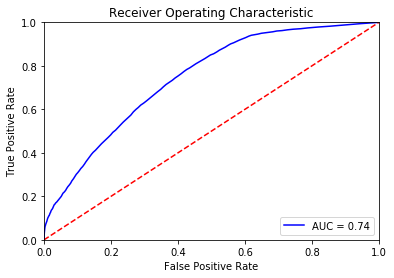

In [50]:
from sklearn.metrics import roc_curve
y_test= '1' <= y_test

fpr, tpr, threshold = roc_curve(y_test, predictions)
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Random forest Regressor  on the boostraped data  

In [51]:
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(X_train_b, y_train_b);

In [52]:
predictions_b = rf.predict(X_test)

0.7347719750809347


Text(0.5, 0, 'False Positive Rate')

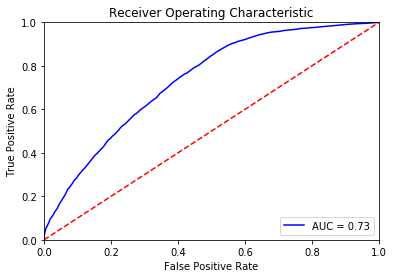

In [53]:
fpr, tpr, threshold = roc_curve(y_test, predictions_b )
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [136]:

#Do the confusion matrix in this case 

### Random forest classifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Tuning hyper parameters 

### The optim took 77 mins 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0)

n_estimators = [1000,2000]
max_depth = [25, 30, 35]
min_samples_split = [6, 7, 8, 9,10]
min_samples_leaf = [1] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 133.6min finished


In [45]:
gridF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 1000}

Best param grid search first run 

max_depth: 30,
min_samples_leaf: 1,
min_samples_split: 10,
n_estimators: 300

Second Run 


max_depth: 30
min_samples_leaf: 1
min_samples_split: 8,
n_estimators: 1000

In [206]:
pred=gridF.predict(X_test)
proba_rf=gridF.proba(X_test)

AttributeError: 'GridSearchCV' object has no attribute 'proba'

In [204]:
pred[1:100]

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False])

In [209]:
#pred= '1' <= pred

#conf_mat = confusion_matrix(y_test, predictions)
#print(conf_mat)

### Fitting the model

In [139]:

clf = RandomForestClassifier(n_estimators=1000, random_state=0,  min_samples_split= 8,max_depth= 30, min_samples_leaf= 1  )
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


In [140]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Feature ranking:
1. feature 9 (0.203589)
2. feature 1 (0.148510)
3. feature 0 (0.128209)
4. feature 2 (0.120295)
5. feature 13 (0.063236)
6. feature 16 (0.044694)
7. feature 12 (0.040696)
8. feature 11 (0.019723)
9. feature 8 (0.016488)
10. feature 27 (0.012396)
11. feature 17 (0.011526)
12. feature 18 (0.011507)
13. feature 3 (0.010662)
14. feature 35 (0.009461)
15. feature 36 (0.009326)
16. feature 29 (0.009192)
17. feature 4 (0.009002)
18. feature 30 (0.008823)
19. feature 34 (0.008605)
20. feature 28 (0.008284)
21. feature 38 (0.007993)
22. feature 31 (0.007915)
23. feature 15 (0.007579)
24. feature 32 (0.007555)
25. feature 37 (0.007549)
26. feature 5 (0.007095)
27. feature 21 (0.006834)
28. feature 6 (0.006702)
29. feature 23 (0.006678)
30. feature 24 (0.006672)
31. feature 20 (0.006173)
32. feature 7 (0.005927)
33. feature 19 (0.005876)
34. feature 26 (0.005174)
35. feature 22 (0.005051)
36. feature 25 (0.004677)
37. feature 39 (0.000181)
38. feature 10 (0.000093)
39. feature 33

TypeError: 'module' object is not callable

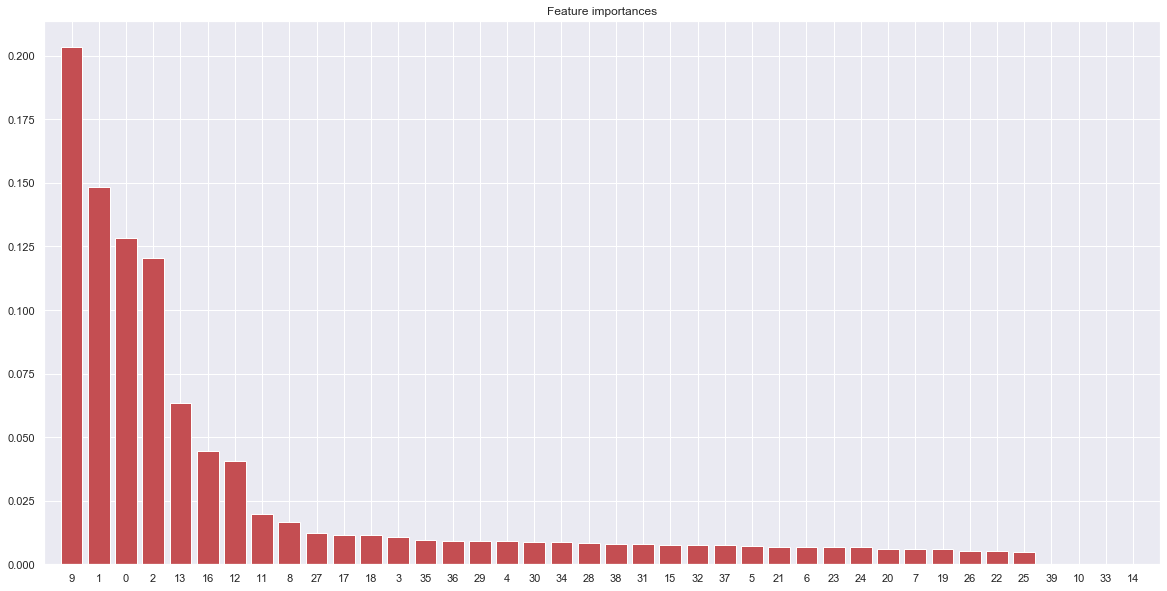

In [66]:
import matplotlib.pyplot as plt 
#for f in range(X_train.shape[1]):
 #   print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
#
# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="r", yerr=std[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [212]:
X_train.dtypes

PatientId                        float64
AppointmentID                    float64
Age                                int64
Scholarship                        int64
Hipertension                       int64
Diabetes                           int64
Alcoholism                         int64
Handcap                            int64
SMS_received                       int64
differenceDay                    float64
Year_S                             int64
Month_S                            int64
Day_S                              int64
Hour                               int64
Year_A                             int64
Month_A                            int64
Day_A                              int64
Gender_0                           uint8
Gender_1                           uint8
Neighbourhood_CENTRO               uint8
Neighbourhood_ITARARÉ              uint8
Neighbourhood_JARDIM CAMBURI       uint8
Neighbourhood_JARDIM DA PENHA      uint8
Neighbourhood_MARIA ORTIZ          uint8
Neighbourhood_RE

In [ ]:
# bootsraped data 
clf_b = RandomForestClassifier(n_estimators=1000, random_state=0,  min_samples_split= 8,max_depth= 30, min_samples_leaf= 1  )
clf_b.fit(X_train_b, y_train_b)
predictions_b = clf_b.predict(X_test)

In [68]:
predictions_proba=clf.predict_proba(X_test)
predictions_proba[:,1]

array([0.02988968, 0.46839856, 0.3646671 , ..., 0.1943074 , 0.05818926,
       0.04514904])

In [69]:
predictions_proba_b=clf_b.predict_proba(X_test)
predictions_proba_b[:,1]

array([0.10714598, 0.70236817, 0.57327194, ..., 0.4284708 , 0.11051415,
       0.17055153])

0.753187525459592
0.7429244302102077


Text(0.5, 0, 'False Positive Rate')

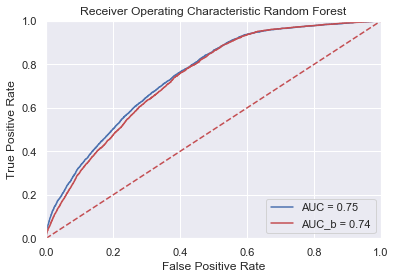

In [215]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#y_test= '1' <= y_test


fpr, tpr, threshold = roc_curve(y_test, predictions_proba[:,1] )
fpr_b, tpr_b, threshold_b = roc_curve(y_test, predictions_proba_b[:,1] )

roc_auc = auc(fpr, tpr)
print(roc_auc)
roc_auc_b = auc(fpr_b, tpr_b)
print(roc_auc_b)

plt.title('Receiver Operating Characteristic Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_b, tpr_b, 'r', label = 'AUC_b = %0.2f' % roc_auc_b)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [153]:
predictions= '1' <= predictions

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)


[[17445   283]
 [ 3889   489]]


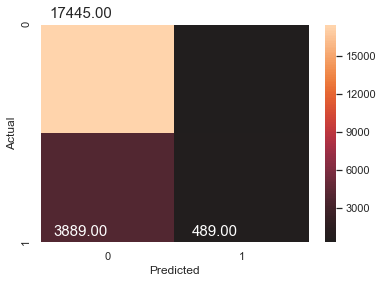

<Figure size 1440x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [207]:
# try to get the value at the bottom printed as well would be cool + there 

#cmn = conf_mat / conf_mat.astype(np.float).sum(axis=1)

import seaborn as sns
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import matplotlib.transforms

akws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(conf_mat,  annot=True, annot_kws={"size": 15},fmt='.2f',center=True)

for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.2, -0.05,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.figure(figsize=(20,20))
plt.show()
plt.savefig("confmat_rf.png")

In [141]:
predictions_rf=predictions
predictions_proba_rf=predictions_proba
predictions_proba_b_rf=predictions_proba

### Boosting 

In [147]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(max_depth=8,learning_rate=0.1,n_estimators=180)

xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [148]:
xgb_b_clf = XGBClassifier(max_depth=8,learning_rate=0.1,n_estimators=180)
xgb_b_clf.fit(X_train_b, y_train_b)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [149]:
pred_xgb=xgb_clf.predict(X_test)
pred_xgb_b=xgb_b_clf.predict(X_test)

In [152]:
#pred_xgb= '1' <= pred_xgb

conf_mat = confusion_matrix(y_test, pred_xgb)
print(conf_mat)

NameError: name 'confusion_matrix' is not defined

In [ ]:
#cm = conf_mat /conf_mat.astype(np.float).sum(axis=0)


akws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(conf_mat,  annot=True, annot_kws={"size": 15},fmt='.2f',center=True)

for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.2, -0.05,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.figure(figsize=(20,20))
plt.show()

The problem with this model is that most of the predictions are 0 so not really useful in practice 

In [179]:
pred_xgb_b= '1' <= pred_xgb_b

conf_mat_b = confusion_matrix(y_test, pred_xgb_b)
print(conf_mat_b)

[[10866  6862]
 [ 1175  3203]]


In [ ]:
#cm_b = conf_mat_b /conf_mat_b.astype(np.float).sum(axis=0) vmin=0, vmax=1 in ax 


akws = {"ha": 'left',"va": 'top'}
ax = sns.heatmap(conf_mat_b,  annot=True, annot_kws={"size": 15},fmt='.2f',center=True)

for t in ax.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(-0.2, -0.05,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
# getting the proba 
proba_xgb=xgb_clf.predict_proba(X_test)
proba_xgb_b=xgb_b_clf.predict_proba(X_test)


0.7507897498445625
0.741912688442211


Text(0.5, 0, 'False Positive Rate')

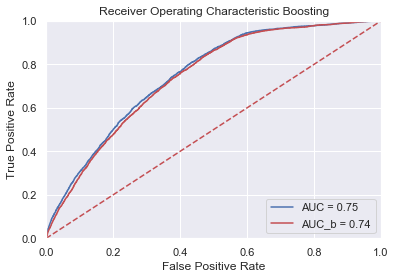

In [217]:
fpr, tpr, threshold = roc_curve(y_test, proba_xgb[:,1] )
fpr_b, tpr_b, threshold_b = roc_curve(y_test, proba_xgb_b[:,1] )

roc_auc = auc(fpr, tpr)
print(roc_auc)
roc_auc_b = auc(fpr_b, tpr_b)
print(roc_auc_b)

plt.title('Receiver Operating Characteristic Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_b, tpr_b, 'r', label = 'AUC_b = %0.2f' % roc_auc_b)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Parameter tuning for Xgboost 


In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


from xgboost import XGBClassifier

In [49]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (6 ,10, 1),
    'n_estimators': range(160, 210, 10),
    'learning_rate': [0.1, 0.2, 0.08]
}

In [50]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 5,
    verbose=True
)

In [82]:
#grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

First run GridSearch 

parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

results: 

learning_rate=0.1,
max_depth=8
n_estimators=180

### Logistic regression 

The issue is that the variable shouldn't be one - hot encoded for logistic regression 

In [84]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train.iloc[:,1:16],y_train)
proba_logit = logmodel.predict_proba(X_test.iloc[:,1:16])
predict_logit = logmodel.predict(X_test.iloc[’1:16])

In [85]:
logmodel = LogisticRegression()
logmodel.fit(X_train_b.iloc[:,1:16],y_train_b)
proba_logit_b = logmodel.predict_proba(X_test.iloc[:,1:16])
predict_logit_b = logmodel.predict(X_test.iloc[:,1:16])

In [86]:
proba_logit_b

array([[0.60524963, 0.39475037],
       [0.28232961, 0.71767039],
       [0.49577837, 0.50422163],
       ...,
       [0.49645772, 0.50354228],
       [0.5921273 , 0.4078727 ],
       [0.65942106, 0.34057894]])

In [87]:
proba_logit

array([[0.80184757, 0.19815243],
       [0.79394845, 0.20605155],
       [0.79833531, 0.20166469],
       ...,
       [0.79879913, 0.20120087],
       [0.80062578, 0.19937422],
       [0.8013066 , 0.1986934 ]])

In [210]:
#predict_logit= '1' <= predict_logit

conf_mat = confusion_matrix(y_test, predict_logit)
print(conf_mat)

[[17728     0]
 [ 4378     0]]


In [211]:

conf_mat = confusion_matrix(y_test, predict_logit_b)
print(conf_mat)

[[13062  4666]
 [ 2137  2241]]


In [89]:
predict_logit_b= '1' <= predict_logit_b
conf_mat_b = confusion_matrix(y_test, predict_logit_b)
print(conf_mat_b)

NameError: name 'confusion_matrix' is not defined

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_logit_b))

              precision    recall  f1-score   support

       False       0.80      1.00      0.89     17728
        True       0.00      0.00      0.00      4378

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.45     22106
weighted avg       0.64      0.80      0.71     22106



0.6232354415456013
0.6623500976328971


<Figure size 1440x720 with 0 Axes>

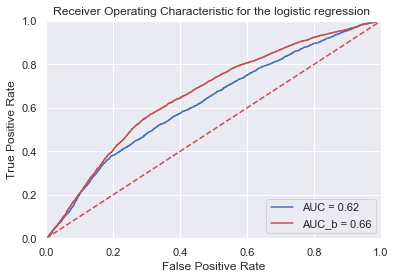

<Figure size 1440x720 with 0 Axes>

In [172]:
fpr, tpr, threshold = roc_curve(y_test, proba_logit[:,1] )
fpr_b, tpr_b, threshold_b = roc_curve(y_test, proba_logit_b[:,1] )

roc_auc = auc(fpr, tpr)
print(roc_auc)
roc_auc_b = auc(fpr_b, tpr_b)
print(roc_auc_b)



plt.title('Receiver Operating Characteristic for the logistic regression ')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_b, tpr_b, 'r', label = 'AUC_b = %0.2f' % roc_auc_b)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(20,10))

0.6232354415456013
0.6623500976328971


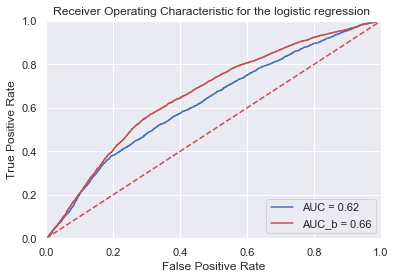

<Figure size 1440x720 with 0 Axes>

In [208]:
fpr, tpr, threshold = roc_curve(y_test, proba_logit[:,1] )
fpr_b, tpr_b, threshold_b = roc_curve(y_test, proba_logit_b[:,1] )

roc_auc = auc(fpr, tpr)
print(roc_auc)
roc_auc_b = auc(fpr_b, tpr_b)
print(roc_auc_b)



plt.title('Receiver Operating Characteristic for the logistic regression ')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_b, tpr_b, 'r', label = 'AUC_b = %0.2f' % roc_auc_b)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.figure(figsize=(20,10))

plt.savefig("logistic_roc.png")

### Printing all the roc curve together 

Text(0.5, 0, 'False Positive Rate')

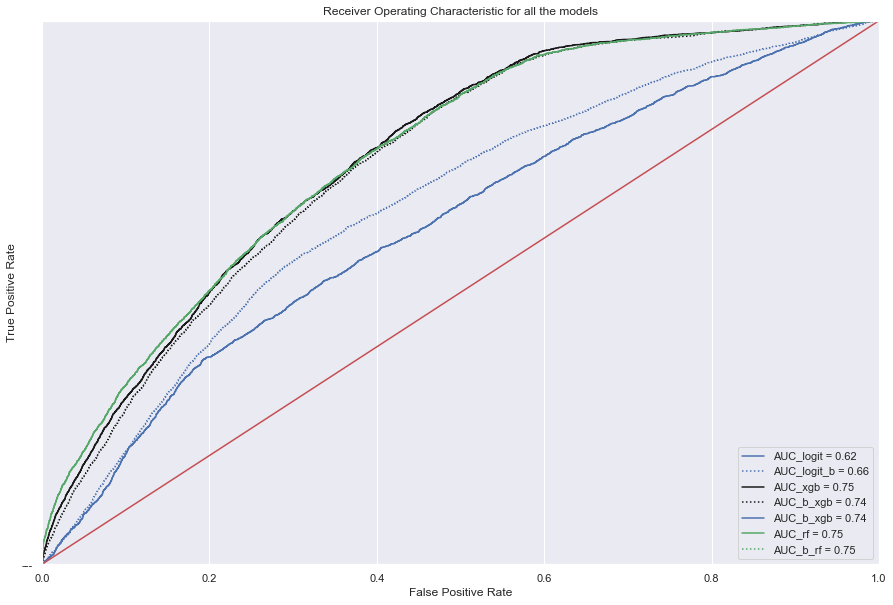

In [170]:
fpr, tpr, threshold = roc_curve(y_test, proba_logit[:,1] )
fpr_b, tpr_b, threshold_b = roc_curve(y_test, proba_logit_b[:,1] )

fpr_rf, tpr_rf, thresholdrf = roc_curve(y_test, predictions_proba_rf[:,1] )
fpr_b_rf, tpr_b_rf, threshold_brf = roc_curve(y_test, predictions_proba_b_rf[:,1] )



roc_auc = auc(fpr, tpr)

roc_auc_b = auc(fpr_b, tpr_b)


roc_auc_rf = auc(fpr_rf, tpr_rf)

roc_auc_b_rf = auc(fpr_b_rf, tpr_b_rf)

fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, proba_xgb[:,1]  )
fpr_b_xgb, tpr_b_xgb, threshold_b_xgb = roc_curve(y_test, proba_xgb_b[:,1]  )

roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

roc_auc_b_xgb = auc(fpr_b_xgb, tpr_b_xgb)

plt.figure(figsize=(15,10))
plt.title('Receiver Operating Characteristic for all the models')
plt.plot(fpr, tpr, 'b', label = 'AUC_logit = %0.2f' % roc_auc)
plt.plot(fpr_b, tpr_b, 'b:', label = 'AUC_logit_b = %0.2f' % roc_auc_b)
plt.plot(fpr_xgb, tpr_xgb, 'k', label = 'AUC_xgb = %0.2f' % roc_auc_xgb)
plt.plot(fpr_b_xgb, tpr_b_xgb, 'k:','---', label = 'AUC_b_xgb = %0.2f' % roc_auc_b_xgb)
plt.plot(fpr_rf, tpr_rf, 'g', label = 'AUC_rf = %0.2f' % roc_auc_rf)
plt.plot(fpr_b_rf, tpr_b_rf, 'g:', label = 'AUC_b_rf = %0.2f' % roc_auc_b_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_logit_b))

### Tuned SVM 

In [62]:
from sklearn.metrics import confusion_matrix

TypeError: Invalid comparison between dtype=bool and str

In [73]:
y_train_b.value_counts()


0    30000
1    30000
Name: No-show, dtype: int64

In [85]:
X_train_b.shape

(60000, 40)

In [93]:
type(y_train_b.to_frame())

pandas.core.frame.DataFrame

In [113]:
y_train_b.to_frame()['No-show']

SyntaxError: invalid syntax (<ipython-input-113-d7780a4a7027>, line 1)

In [131]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict_proba(X_test)
predictions[1:10]

array([[0.50390478, 0.49609522],
       [0.50000371, 0.49999629],
       [0.66588039, 0.33411961],
       [0.90997681, 0.09002319],
       [0.56023827, 0.43976173],
       [0.50451165, 0.49548835],
       [0.50232276, 0.49767724],
       [0.50000441, 0.49999559],
       [0.50256695, 0.49743305]])

In [152]:
proba_logit_b[:,1]

array([0.49996459, 0.49996854, 0.49999997, ..., 0.49965231, 0.49995542,
       0.49999555])

# unsupervised 

In [183]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

we can imagine selecting the variable with the types that works and also do some kmeans 



In [184]:

y_kmeans

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [186]:


y_train = '1' <= y_train 
from sklearn.metrics import confusion_matrix
conf_mat_K = confusion_matrix(y_train, y_kmeans)
print(conf_mat_K)

[[59095 11385]
 [15053  2888]]


In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig


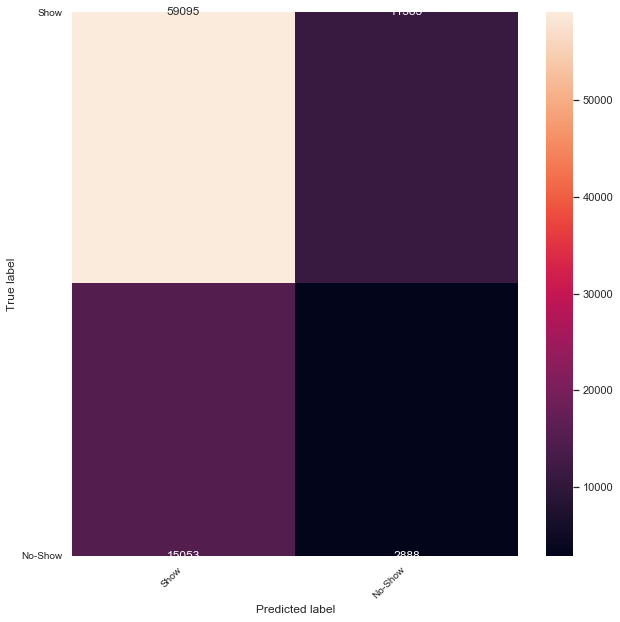

In [205]:
print_confusion_matrix(conf_mat_K, ["Show","No-Show"], figsize = (10,10), fontsize=10)
plt.savefig("hudbdj.png")

In [198]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




In [201]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title ='Confusion matrix, without normalization'
    
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [206]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)
import itertools
import numpy as np
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_train, y_kmeans, classes=["",""])
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X_train.iloc[:,2:9])

In [65]:
X_train.iloc[:,2:9].dtypes

Age             int64
Scholarship     int64
Hipertension    int64
Diabetes        int64
Alcoholism      int64
Handcap         int64
SMS_received    int64
dtype: object

In [151]:
y_test= '1' <= y_test

In [155]:
import matplotlib.pyplot as plt 